# Playground

### Import Libraries

In [2]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
import math as mt
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Important Points

This is a playgorund for the training of neural network via backpropagation method.
The user can define multiple parameters to test out different results.

The list of parameters along with their constraints are as follows:

**1- Network Architecture:** 

The user must define the architecture of the ``neural network``. The program will first ask for number of ``layers`` to be included into the model. There is no restriction on number of ``layers``. A user can add as many layers as desired. 

Furthermore, the program will ask for number of ``neurons`` to be included into each ``layer``. A user can add as many ``neurons`` as desired but the ``input layer`` must have ``4 neurons`` (as the dataset has 4 features) and either ``4 or 2 neurons`` in ``output layer``. The hidden layers can have any number of ``neurons``.

**2- Activation Function:**

A user can choose between either ``sigmoid`` or ``tanh`` as activation functions. 

**3- Batch Size:**

A user can enter any value for the ``batch size``

**4- Epochs:**

User can enter any value for the number of ``epochs``

**5- Instances:**

A user can enter any number less than ``10,000`` as the number of instances of the data. 

**6- Split:**

A user can enter a value between 0 and 1 to determine the ``test_train_split``. A value of ``0.3`` would mean that ``30%`` data would be used for ``testing`` purposes while ``70%`` of the data would be used for ``training`` purposes.

**7- Learning Rate:**

A user can enter a value between 0 and 1 to determine the ``learning rate`` for the model.




### How to Run the Program?

To run the program, kindly first run the **Functions** named cell. Then run the cell with the following line of code:

``_main_()``

# Functions

All the functions used for this playground are defined here. Hence, its imperitive that this cell is executed first

In [16]:

# Main function
def _main_():

  layers, activation_func, instances, l_r, split, batch_size, epochs = input_()
  data,__ = data_gen()
  process(data,layers,activation_func, instances, l_r, split, batch_size, epochs)



# Takes input from the user
# Layers - Network Architecture eg: [4,3,3,4]
# Activation Function - tanh or sigmoid
# Instances - Number of records to be included into the dataset. Max: 10000
# l_r - Learning Rate. Value between 0 and 1
# Split - Train Test Split Ratio, eg: A value of 0.3 means 30% test set and 70% train set
# Batch_size - Batch Size for Stochastic Gradient Descent
# Epochs - Number of Epochs 
def input_():


  layers = []
  n = int(input("\n\nEnter number of layers for the Netwrok (eg: if entered 4 then it means 1 input layer, 2 hidden layers, and 1 output layer ) : "))
  for i in range(0, n):
    ele = int(input("\n\nEnter number of neurons for each layer: "))
    layers.append(ele) 
  print(layers)
  activation_func = str(input("\n\nEnter either 'tanh' or 'sigmoid' as activation function: "))
  instances = int(input("\n\nEnter the number of instances of the data (Any value less than or equal to 10K): "))
  l_r = float(input("\n\nEnter the learning rate value: "))
  split = float(input("\n\nEnter the test_train split ratio (eg: 0.1 ratio means 10% testing data and 90% training data): "))
  batch_size = int(input("\n\nEnter the batch size value: "))
  epochs = int(input("\n\nEnter the number of epochs: "))
  return (layers, activation_func, instances, l_r, split, batch_size, epochs)

# Generates normally distributed data
def data_gen():
  data = []
  data, labels = make_blobs(10000, 4, random_state = 0, centers = 4)
  data = pd.DataFrame(data)
  data["Output"] = labels
  return data,labels

# Initialize weights and biases
def init_w_b (layers):
  biases = [np.random.randn(y, 1) for y in layers[1:]]
  weights = [np.random.randn(y, x) for x, y in zip(layers[:-1], layers[1:])]
  return (weights, biases)

# Sigmoid
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# Derivative of Sigmoid
def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# Derivative of Tanh
def tanh_prime(z):
  return (1-tanh_(z)**2)

# Tanh
def tanh_(z):
  return ((np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)))


# Feed forward - Returns activation values and z values for each layer
def feed_forward(x,y,weights,biases, activation_func):
  
  a_ = x
  z_list = []
  a_list = [x]

  if activation_func == 'sigmoid':
    for i in range(len(weights)):
      weights_=weights[i]
      z = np.dot(weights_,a_) + biases[i]
      z_list.append(z)
      #print(z)
      a_ = sigmoid(z)
      a_list.append(a_)

  if activation_func == 'tanh':
    for i in range(len(weights)):
      weights_=weights[i]
      z = np.dot(weights_,a_) + biases[i]
      z_list.append(z)
      #print(z)
      a_ = tanh_(z)
      a_list.append(a_)

  return a_list, z_list
#cost = a_list[-1] - y.flatten()
#c_list.append(cost)

# Mapping function for the output labels. Converts the integer values of 0,1,2,3 to respective arrays (works like one-hot encoding)
def y_map(y, layers):

  if layers[-1] == 4: # if output nuerons are 4
    if y == 0: y_ = np.array([1,0,0,0]).reshape(4,1)
    if y == 1: y_ = np.array([0,1,0,0]).reshape(4,1)
    if y == 2: y_ = np.array([0,0,1,0]).reshape(4,1)
    if y == 3: y_ = np.array([0,0,0,1]).reshape(4,1)

  if layers[-1] == 2: # if output neurons are 2
    if y == 0: y_ = np.array([0,0]).reshape(2,1)
    if y == 1: y_ = np.array([0,1]).reshape(2,1)
    if y == 2: y_ = np.array([1,0]).reshape(2,1)
    if y == 3: y_ = np.array([1,1]).reshape(2,1)

  return y_

# Backprop - Back propagates the error and calculates partial derivatives for weights (pd_weights) and partial derivatives for biases (pd_biases) for each layer
def backprop( x, y, biases, weights, a_list,z_list, activation_func,layers):
        
  pd_biases = [np.zeros(bias.shape) for bias in biases]
  pd_weights = [np.zeros(weight.shape) for weight in weights]

  if activation_func == 'sigmoid':
    delta = (a_list[-1]-y) *  sigmoid_prime(z_list[-1]) # Calculates delta of the last/output layer
    pd_biases[-1] = delta # put the value delta equal to the partial derivative of biases of the neurons of output layer
    pd_weights[-1] = np.dot(delta,a_list[-2].transpose()) #Dot product of activation of second last layer and delta (put that euqual to partial derivatives of weights for last layer)

    for l in range(2, len(layers)):
      z = z_list[-l]
      delta = np.dot(weights[-l+1].transpose(), delta) * sigmoid_prime(z)# calculates delta for second last, third last and so on layers by using z values for respective layers
      pd_biases[-l] = delta # put the delta value equal to partial derivatives of biases for second last layer and so on
      pd_weights[-l] = np.dot(delta, a_list[-l-1].transpose()) # take dot product of activations of previous layer with the delta recursively and store that patrial derivative value 
      
# Description is same as for sigmoid
  if activation_func == 'tanh':
    delta = (a_list[-1]-y) *  tanh_prime(z_list[-1])
    pd_biases[-1] = delta
    pd_weights[-1] = np.dot(delta,a_list[-2].transpose())

    for l in range(2, len(layers)):
      z = z_list[-l]
      delta = np.dot(weights[-l+1].transpose(), delta) * tanh_prime(z)
      pd_biases[-l] = delta
      pd_weights[-l] = np.dot(delta, a_list[-l-1].transpose())
  
  return (pd_weights, pd_biases) # return partial derivatives of weights and biases


# This function is used for the case when there are 2 output neurons in the architecture instead of 4. 
# This function changes the prediction of the network of the form eg: [0.5,0.3] to a single integer label either 0,1,2 or 3 
def y_p_2 (activations,layers):

# Mapping - y = 0,1,2,3, then y_ = [0,0], [0,1], [1,0], [1,1]
# The logic works on the principle of bits. If the output activation of prediction has maximum value on first bit then the only outcomes would be either [1,0] 2 OR [1,1] 3
# If maximum value of the output activation lies on second bit then the only outcomes would be [0,1] 1 or [1,1] 3
# The logic is further enhanced to incorporate the outputs of the form [same value, same value] eg [0.5,0.5] or [0.1,0.1]
# A threshold value of 0.5 is taken to overcome all other possible outcomes

  if np.argmax(activations[-1]) == 0:
    if activations[-1][1] >= 0.5:
      y_p = 3
    else:
      y_p = 2
      
  if np.argmax(activations[-1]) == 1:
    if activations[-1][0] >= 0.5:
      y_p = 3
    else:
      y_p = 1

  if activations[-1][0] == activations[-1][1] and activations[-1][0] >= 0.5:
    y_p = 3

  if activations[-1][0] == activations[-1][1] and activations[-1][0] < 0.5:
    y_p = 0

  if activations[-1][0] >= 0.5 and activations[-1][1] >= 0.5:
    y_p = 3

  if activations[-1][0] < 0.5 and activations[-1][1] < 0.5:
    y_p = 0

  if activations[-1][0] >= 0.5 and activations[-1][1] < 0.5:
    y_p = 2

  if activations[-1][0] < 0.5 and activations[-1][1] >= 0.5:
    y_p = 1

  else:
    y_p = 0

  return y_p # returns the predicted value (0,1,2,3)

# Returns accuracy of the training of the network (on testing dataset) after each epoch
def evaluate_epoch (weights,biases, X_test,y_test,layers,activation_func):

  y_pred = []
  for i in range(0,len(X_test)):
    x = np.array(X_test.values[i]).reshape(4,1)
    y = y_test.values[i]

    y_ = y_map(y,layers)

    activations,_ = feed_forward(x,y_,weights,biases,activation_func)
    if layers[-1] == 4:
      y_p = np.argmax(activations[-1])
      y_pred.append(y_p) 

    if layers[-1] == 2:
      y_p = y_p_2 (activations, layers)
      y_pred.append(y_p)

  acc = 0
  for y_actual, y_predicted in zip (y_test.values,y_pred):
    if y_actual == y_predicted:
      acc = acc + 1
  return acc

# Returns sum of all pd's for weights and biases in each layer for a single batch
# This is the most important function. As it sums all partial derivatives of weights and biases calculated for each instance of the mini batch accross all layers of the network
# The sum of all partial derivatives of weights and biases for a single layer accross all instances of mini batch are added together and stored
# Suppose mini batch size is 64. Then you would have 64 different partial derivative matrices each for weights and biases.
# Now you have to add all 64 partial derivatives of weights and biases for the first layer and store it into a different matrix at proper index
# then add all 64 partial derivatives of weights and biases for the second layer and store it into the next index of the matrix
# Iterate like that until you have a new matrices having layer by layer sum of all partial derivatives of weights and biases

def pd_batch_sum (pd_weights_list,pd_biases_list, weights, biases):
  w_a1_list = [] # an empty list to store all pd's for weights layer by layer
  b_a1_list = [] # an empty list to store all pd's for wbiases layer by layer
  batch_biases = [np.zeros(b.shape) for b in biases] # initialize an empty array of the same shape as of biases
  batch_weights = [np.zeros(w.shape) for w in weights] # initialize an empty array of the same shape as of weights
  for i in range(0,len(weights)): # loops accross all layers
    sum = 0
    w_a1_list = []
    for j in range(0,len(pd_weights_list)): # pd_weights_list contains all partial derivatives of wieghts calculated at each instance of the mini batch

      w_a1 = pd_weights_list[j][i]
      #print(w_a1)
      w_a1_list.append(w_a1)
    #print(w_a1_list)

    for k in range(0,len(w_a1_list)):
      sum = sum + w_a1_list[k]
    batch_weights[i]=sum
#print(batch_weights)

  for i in range(0,len(biases)):
    sum = 0
    b_a1_list = []
    for j in range(0,len(pd_biases_list)):

      b_a1 = pd_biases_list[j][i]
      #print(w_a1)
      b_a1_list.append(b_a1)
    #print(w_a1_list)

    for k in range(0,len(b_a1_list)):
      sum = sum + b_a1_list[k]
    batch_biases[i]=sum

#print(batch_biases)
  return batch_weights,batch_biases # summed partial derivatives of weights and biases

# Returns total accuracy (calculated over testing data) of the model after complete training. Also, returns f1 score, precision, recall and support for each class 
def evaluate_training (weights,biases, X_test,y_test,layers,activation_func):

  y_pred = []
  for i in range(0,len(X_test)):
    x = np.array(X_test.values[i]).reshape(4,1)
    y = y_test.values[i]
    y_ = y_map(y, layers)
    activations,_ = feed_forward(x,y_,weights,biases,activation_func)

    if layers[-1] == 4:
      y_p = np.argmax(activations[-1])
      y_pred.append(y_p) 

    if layers[-1] == 2:
      y_p = y_p_2(activations,layers)
      y_pred.append(y_p)

  labels = ["0","1","2","3"]

  acc = accuracy_score(y_test.values,y_pred)
  cls_rprt = classification_report(y_test.values, y_pred, target_names= labels)
  return (cls_rprt,acc)


# Updates the weights and biases after each batch
def updater(batch_weights, batch_biases,weights,biases, l_r,batch_size):
  new_weights = [np.zeros(bias.shape) for bias in biases]
  new_biases = [np.zeros(weight.shape) for weight in weights]
  new_weights = [weight-(l_r/batch_size)*batch_weight for weight, batch_weight in zip(weights, batch_weights)]
  new_biases = [bias-(l_r/batch_size)*batch_bias for bias, batch_bias in zip(biases, batch_biases)]
  return new_weights, new_biases


# The core function that combines all other functions to train and test the network
def process(data, layers, activation_func, instances, l_r, split, batch_size, epochs):

  weights, biases = init_w_b(layers) # weights and biases are initialized
  data = data.iloc[0:instances,:]
  batch_size = batch_size
  data_n = data.iloc[:,:len(data.columns)-1]
  target = data.iloc[:,len(data.columns)-1]
  X_train, X_test, y_train, y_test = train_test_split(data_n, target,test_size = split ,random_state=42) # train-test split
  #X_data  = pd.DataFrame(X_train,y_train)
  X_train['Output'] = y_train
  n_train = len(X_train)
  acc_list = []
  start = time.time()
  for j in range(0,epochs):
    #print('\n\nepoch',j)
    X_train.sample(frac = 1)
    mini_batches = [X_train[k:k+batch_size] for k in range(0, n_train, batch_size)]

    for mb in mini_batches:
      #print('\n\nminibatch')
      X = mb.iloc[:,0:len(mb.columns)-1].values
      Y = mb.iloc[:,len(mb.columns)-1].values
      pd_weights_list = []
      pd_biases_list = []

      for i in range(0,len(mb)):
        x = np.array(X[i]).reshape(len(X[i]),1)
        y = Y[i]
        y_ = y_map(y,layers) # label - array mapping
        a_list, z_list = feed_forward(x,y_,weights,biases,activation_func) # feed foward

        pd_weights, pd_biases = backprop(x,y_,biases,weights,a_list,z_list, activation_func,layers) # backpropagate

        pd_weights_list.append(pd_weights) # a list containing all pd's for weights
        pd_biases_list.append(pd_biases) # a list containing all pd's for biases

      batch_weights, batch_biases = pd_batch_sum (pd_weights_list,pd_biases_list, weights,biases) # calculates a summed partial derivative array for weights and biases
      weights_new, biases_new = updater(batch_weights, batch_biases,weights,biases, l_r,batch_size) # updates the weights and biases
      weights = weights_new
      biases = biases_new
      #print('\n\nweights',weights)
      #print('\n\nbiases',biases)
    acc = evaluate_epoch (weights,biases, X_test,y_test, layers,activation_func)
    acc_list.append(acc/len(y_test)*100)
    print ("Epoch {0}: Accuracy is: {1} % ".format(j, (acc/len(y_test)*100)))

  cls_rprt, accuracy = evaluate_training(weights,biases, X_test,y_test,layers,activation_func)
  stop = time.time()
  print("\n\nNetwork: ", layers)
  print("\nData Instances: ", instances)
  print("\nTest_Train_Split: ", split)
  print("\nBatch Size: ", batch_size)
  print("\nlearning Rate: ", l_r)
  print("\nEpochs: ", epochs)
  print("\nActivation Function: ", activation_func)
  print("\nOutput Neurons: ", layers[-1])
  print("\nElapsed time is {0} seconds: ".format(stop-start))
  plt.plot(range(0,epochs),acc_list)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.title("Accuracy VS Epochs")
  plt.show
  print("\n\nTesting Accuracy is {0}%: ".format(accuracy*100))
  print("\n")
  print("Classification Report for each class is: ")
  print(cls_rprt)






# ``_main_()``

Now run ``_main_()``



Enter number of layers for the Netwrok (eg: if entered 4 then it means 1 input layer, 2 hidden layers, and 1 output layer ) : 4


Enter number of neurons for each layer: 4


Enter number of neurons for each layer: 3


Enter number of neurons for each layer: 3


Enter number of neurons for each layer: 4
[4, 3, 3, 4]


Enter either 'tanh' or 'sigmoid' as activation function: tanh


Enter the number of instances of the data (Any value less than or equal to 10K): 10000


Enter the learning rate value: 0.065


Enter the test_train split ratio (eg: 0.1 ratio means 10% testing data and 90% training data): 0.3


Enter the batch size value: 32


Enter the number of epochs: 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 0: Accuracy is: 75.06666666666668 % 
Epoch 1: Accuracy is: 75.06666666666668 % 
Epoch 2: Accuracy is: 75.06666666666668 % 
Epoch 3: Accuracy is: 71.89999999999999 % 
Epoch 4: Accuracy is: 74.83333333333333 % 
Epoch 5: Accuracy is: 74.83333333333333 % 
Epoch 6: Accuracy is: 74.83333333333333 % 
Epoch 7: Accuracy is: 74.83333333333333 % 
Epoch 8: Accuracy is: 74.83333333333333 % 
Epoch 9: Accuracy is: 74.83333333333333 % 
Epoch 10: Accuracy is: 74.83333333333333 % 
Epoch 11: Accuracy is: 74.83333333333333 % 
Epoch 12: Accuracy is: 74.83333333333333 % 
Epoch 13: Accuracy is: 74.83333333333333 % 
Epoch 14: Accuracy is: 74.83333333333333 % 
Epoch 15: Accuracy is: 74.83333333333333 % 
Epoch 16: Accuracy is: 74.83333333333333 % 
Epoch 17: Accuracy is: 74.83333333333333 % 
Epoch 18: Accuracy is: 74.83333333333333 % 
Epoch 19: Accuracy is: 74.83333333333333 % 
Epoch 20: Accuracy is: 74.83333333333333 % 
Epoch 21: Accuracy is: 74.83333333333333 % 
Epoch 22: Accuracy is: 74.83333333333333 %

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




Network:  [4, 3, 3, 4]

Data Instances:  10000

Test_Train_Split:  0.3

Batch Size:  32

learning Rate:  0.065

Epochs:  50

Activation Function:  tanh

Output Neurons:  4

Elapsed time is 54.58755564689636: 


Testing Accuracy is 74.83333333333333%: 


Classification Report for each class is: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       755
           1       1.00      1.00      1.00       767
           2       0.50      1.00      0.66       748
           3       1.00      1.00      1.00       730

    accuracy                           0.75      3000
   macro avg       0.62      0.75      0.67      3000
weighted avg       0.62      0.75      0.66      3000



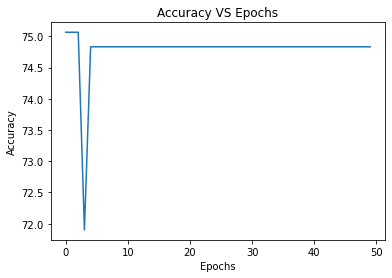

In [15]:
# Run after the cell named Functions is done executing
_main_()